In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
#Testing potential models

Single feature LSTM model using Uber reddit comments sentimental data plus closing prices

In [3]:
uber_sent_df = pd.read_csv('/Users/krist/OneDrive/Desktop/P2G2-ProjectGit/Notebooks/models/resources/UBER_sent_copy.csv', index_col=0)
uber_sent_df.head()

,sec_compound_sentiment,sec_positive_sentiment,sec_neutral sentiment,sec_negative_sentiment,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,volume,close
2019-05-10,1.0,0.111,0.846,0.042,0.060230,0.085886,0.841045,0.073045,189836990.0,41.57
2019-05-11,1.0,0.111,0.846,0.042,-0.114408,0.024583,0.885333,0.090000,189836990.0,41.57
2019-05-12,1.0,0.111,0.846,0.042,0.069736,0.098000,0.844818,0.057091,189836990.0,41.57
2019-05-13,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,79478203.0,37.10
2019-05-14,1.0,0.111,0.846,0.042,0.006767,0.069667,0.877000,0.053333,46661187.0,39.96


In [4]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [5]:
#Setting the feature col to stock market compound sent and target col to closing prices
X, y = window_data(uber_sent_df, window=30, feature_col_number=4, target_col_number=9)

In [6]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]


In [7]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [8]:
# Reshape the features for the model

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [10]:

model = Sequential()

number_units = 5
dropout_fraction = 0.2

#Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

#Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

#Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

#Output Layer
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss = 'mean_squared_error')


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 5)             140       
                                                                 
 dropout (Dropout)           (None, 30, 5)             0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 5)             220       
                                                                 
 dropout_1 (Dropout)         (None, 30, 5)             0         
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [13]:
model.fit(X_train, y_train, epochs=50, shuffle=False, batch_size=32, verbose=1)


Epoch 1/50
24/24 [==============================] - 6s 27ms/step - loss: 0.1815
Epoch 2/50
24/24 [==============================] - 1s 26ms/step - loss: 0.0667
Epoch 3/50
24/24 [==============================] - 1s 36ms/step - loss: 0.0809
Epoch 4/50
24/24 [==============================] - 1s 39ms/step - loss: 0.0760
Epoch 5/50
24/24 [==============================] - 1s 42ms/step - loss: 0.0777
Epoch 6/50
24/24 [==============================] - 1s 48ms/step - loss: 0.0777
Epoch 7/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0750
Epoch 8/50
24/24 [==============================] - 1s 50ms/step - loss: 0.0746
Epoch 9/50
24/24 [==============================] - 1s 55ms/step - loss: 0.0697
Epoch 10/50
24/24 [==============================] - 1s 61ms/step - loss: 0.0757
Epoch 11/50
24/24 [==============================] - 1s 55ms/step - loss: 0.0710
Epoch 12/50
24/24 [==============================] - 1s 56ms/step - loss: 0.0688
Epoch 13/50
24/24 [==================

In [14]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 2s 8ms/step - loss: 0.0193


0.019329726696014404

In [15]:
predict = model.predict(X_test)

11/11 [==============================] - 2s 8ms/step


In [16]:
predicted_prices = scaler.inverse_transform(predict)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [17]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "actual": real_prices.ravel(),
    "predicted": predicted_prices.ravel()
}, index = uber_sent_df.index[-len(real_prices): ]) 
stocks.head()

,actual,predicted
2021-07-09,47.55,38.577496
2021-07-10,49.07,38.504532
2021-07-11,49.07,38.445015
2021-07-12,49.07,38.403305
2021-07-13,48.41,38.356857


<AxesSubplot:title={'center':'Actual vs. Predicted Prices'}, xlabel='Date', ylabel='UBER'>

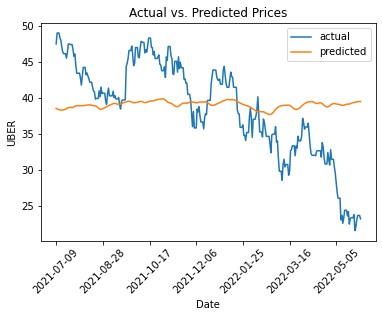

In [21]:
stocks.plot(xlabel = 'Date', ylabel = 'UBER', title = 'Actual vs. Predicted Prices', rot=45)

In [19]:
uber_sent_df[['stockmarket_positive_sentiment', 'close']].corr()

,stockmarket_positive_sentiment,close
stockmarket_positive_sentiment,1.000000,0.069903
close,0.069903,1.000000
